# Guided Project: Popular Data Science Questions

## What kind of questions are welcome on this site? 

For this particular project, the goal was to use Data Science Stack Exchange to see what content a data science company should create for its users. However, there was one requirement in which we cannot ask subjective questions to the users. The types of questions that I wished to analyze on this site were:

1) Practical questions about Data Science.

2) Specific questions

3) Questions that are relevant to others.


## What does the site's home subdivide into? 

For the home page, we see that there are four sections:
    
1) Questions: A list of the questions asked.
    
2) Tags: A list of the tags.
    
3) Users: A list of users.
    
4) Unanswered: A list of unanswered questions.

The tagging system used by Stack Exchange will help us solve this problem to quantify how many questions are asked about each subject. Another important note is that the Stack Exchange's sites are heavily watched by the community.  
    

## What information is available in each post?

There is information that is necessary in each post. For questions, we can see that there is: 
    
1) How many users have it on their "
    
2) The last time the question was active
    
3) How many times the question was viewed
    
4) Related questions
    
5) Question's tags

For the answers, the information that is available are: 
    
1) The post's score
    
2) The post's title
    
3) The post's author
    
4) The post's body
    

## Stack Exchange Data Explorer

From the table names, there are a few candidates that we wish to try and conduct exploratory analysis on. These columns are:

1) Posts

2) Posttags

3) Tags

4) TagSynonyms

From the SQL query shown above, we got a result of the top 10 entries ordered by count of all the columns from the tags table. This particular table looks very promising since it tells us valuable information, such as, how many times the tag was implemented.

## Obtaining the Data

From this query, there are a few things we can see. The first we can see is that the first result that the tags with machine learning and classifcation has a high view count. Also, from the second query, we can see that the posts with ID=1 have the highest number of posts. 

## Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])
questions.head()
questions.info()
questions['FavoriteCount'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


7432

From the data, we can see that the only column with missing values is the FavoriteCount column. The FavoriteCount has 7,432 missing values and to fix this we can try to fill the na's present. The types of each column also do appear to have valid types. Also, for the tags, it's good to see what type object they are.   

In [2]:
questions.apply(lambda val: type(val)).unique()

array([<class 'pandas.core.series.Series'>], dtype=object)

## Cleaning the Data 

In [3]:
questions = questions.fillna(value = {'FavoriteCount' : 0})
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.dtypes
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

For this particular part of the project, we cleaned the data by filling in the FavoriteCount column with 0 and changed the data types to make sure they followed a sensible type. For instance, instead of making FavoriteCount 'float' type, we changed it back to 'int' type. Last but not least, we took out the < and > wherever it occurred within the Tags column. 

## Most Used and Most Viewed 

In [4]:
tags_count = dict()

for c in questions['Tags']:
    for tag in c:
        if tag in tags_count:
            tags_count[tag] += 1
        else: 
            tags_count[tag] = 1

tags_count = pd.DataFrame.from_dict(tags_count, orient = 'index')
tags_count.rename(columns = {0 : 'Count'}, inplace = True)
tags_count.head(10)

            

,Count
generative-models,46
dirichlet,4
supervised-learning,82
question-answering,4
computer-vision,121
algorithms,68
loss-function,161
allennlp,2
image,32
k-nn,50


In [5]:
most_used_tags = tags_count.sort_values(by = 'Count').tail(20)
most_used_tags

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


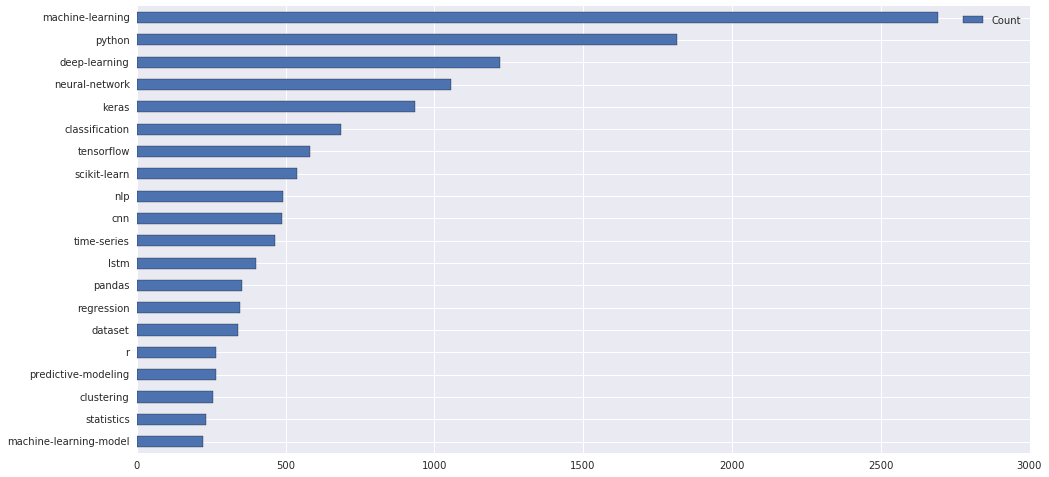

In [6]:
most_used_tags.plot(kind = 'barh', figsize=(16,8))

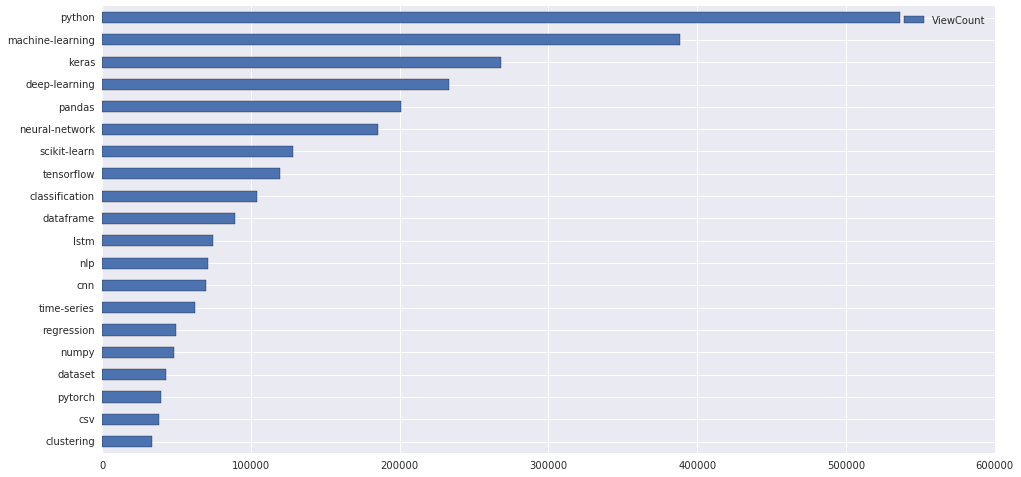

In [7]:
tags_viewed = dict()

for indx, c in enumerate(questions['Tags']):
    for tag in c:
        if tag in tags_viewed:
            tags_viewed[tag] += questions['ViewCount'].iloc[indx]
        else: 
            tags_viewed[tag] = 1

tags_viewed = pd.DataFrame.from_dict(tags_viewed, orient = 'index')
tags_viewed.rename(columns = {0 : 'ViewCount'}, inplace = True)
tags_viewed = tags_viewed.sort_values(by = 'ViewCount').tail(20)
tags_viewed.plot(kind = 'barh', figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16e749cf8>],
      dtype=object)

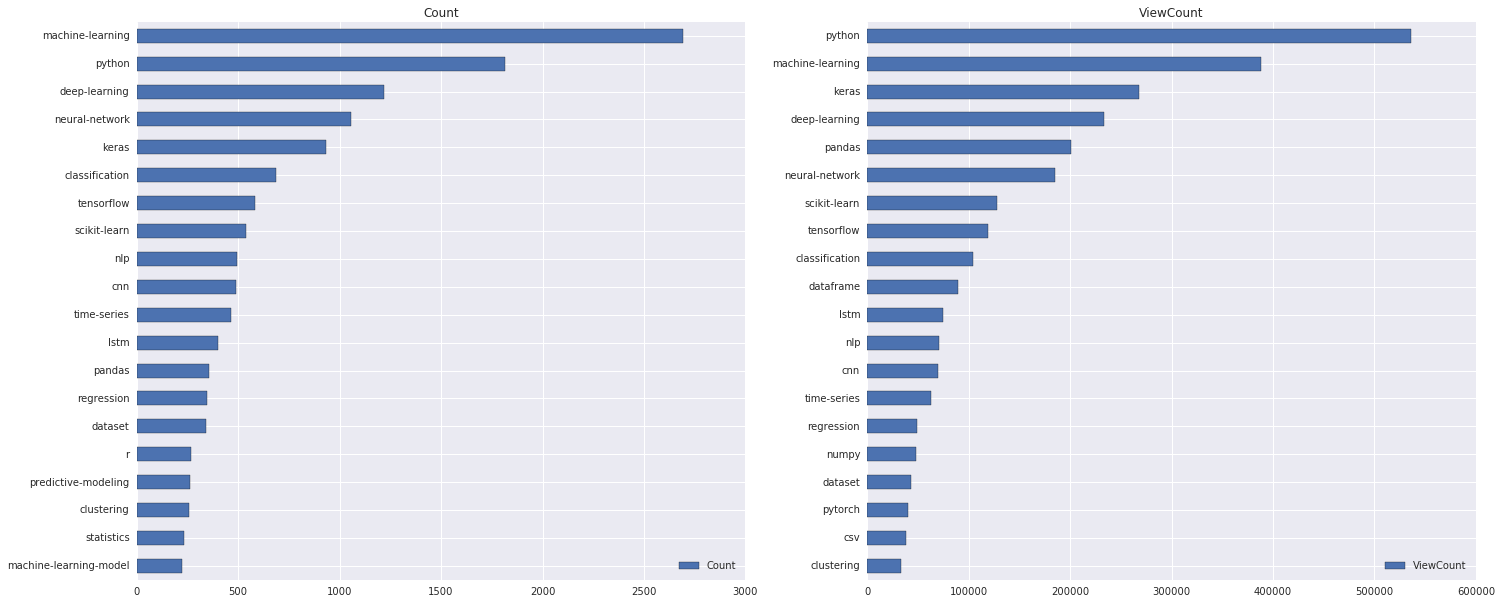

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((24, 10))
most_used_tags.plot(kind = 'barh', ax = axes[0], subplots = True)
tags_viewed.plot(kind = 'barh', ax = axes[1], subplots = True)


In [9]:
in_used = pd.merge(most_used_tags, tags_viewed, how = 'left', left_index = True, right_index = True)
in_view = pd.merge(tags_viewed, most_used_tags, how = 'right', left_index = True, right_index = True)

## Relations Between Tags

In [10]:
print(in_used)
print('\n')
print(in_view)

                        Count  ViewCount
machine-learning-model    224        NaN
statistics                234        NaN
clustering                257    33824.0
predictive-modeling       265        NaN
r                         268        NaN
dataset                   340    43133.0
regression                347    49427.0
pandas                    354   200576.0
lstm                      402    74407.0
time-series               466    62484.0
cnn                       489    69766.0
nlp                       493    71278.0
scikit-learn              540   128056.0
tensorflow                584   119560.0
classification            685   104397.0
keras                     935   268025.0
neural-network           1055   185342.0
deep-learning            1220   233045.0
python                   1814   535935.0
machine-learning         2693   388479.0


                        ViewCount  Count
machine-learning-model        NaN    224
statistics                    NaN    234
clustering    

From these two dataframes, we can see that machine-learning model, statistics, predictive-modeling, and r are in in_used and not in in_view while csv, pytorch and dataframe are in in_view and not in in_used. 


One option to gauge the relationship between two tags is to see how many times each pair appears together. We will make a list of all tags and then create a dataframe where a row and column will represent a tag. We will fill in the dataframe with 0 and with lists that are in questions['Tags'] we will increment by 1. The finished product will be a dataframe for a pair of tags where it will tell us how many times they were used in unison.

I will also create a heat map to see which pair of tags have the strongest relationship, given by the dark green color on the bottom right of the graph below the code and the cell. 

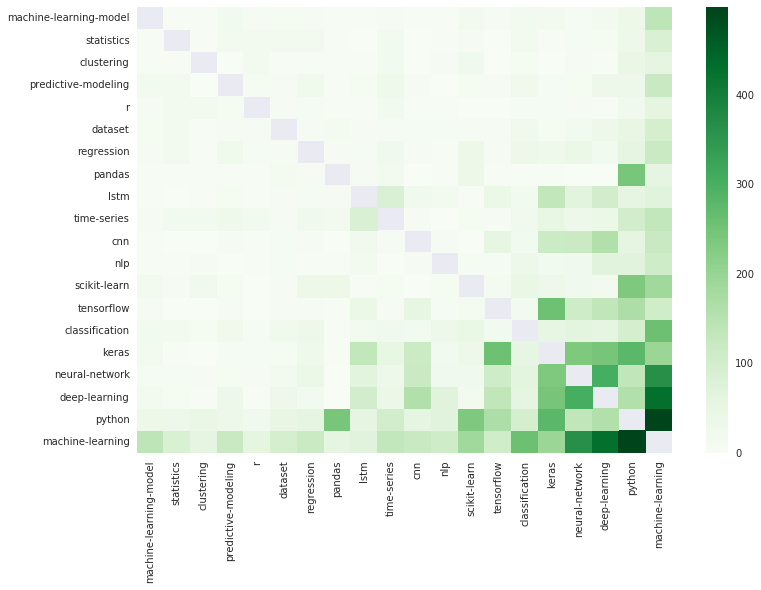

In [11]:
all_tags = list(tags_count.index)
assoc = pd.DataFrame(index = all_tags, columns = all_tags)
assoc.iloc[0:4, 0:4]
assoc.fillna(0, inplace = True)
for tags in questions['Tags']:
    assoc.loc[tags, tags] += 1

most_used_tags_overall = assoc.loc[most_used_tags.index, most_used_tags.index]

for i in range(most_used_tags_overall.shape[0]):
    most_used_tags_overall.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(most_used_tags_overall, cmap = 'Greens', annot = False)

## Enter Domain Knowledge

Keras, scikit-learn, and TensorFlow are libraries that allow users to implement deep learning. Most of the top tags are related to machine learning mostly in the deep learning field. Specifically, deep learning used for classification problems. 

## Just a Fad

In [12]:
all_questions = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>?', '').str.split('><')


Now we will need to classify deep learning tags. I will also get rid of the data for the first quarter of 2020 because I don't have all the data. 

In [19]:
def deep_learning(tags):
    for tag in tags:
        if tag in ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']:
            return 1 
    return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning)
all_questions['DeepLearning'].sample(5)

def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions['Quarter'] = all_questions['CreationDate'].apply(fetch_quarter)

In [20]:
quarterly = all_questions.groupby('Quarter').agg({'DeepLearning' : ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']
quarterly.reset_index(inplace = True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
20,19Q2,50,2393,0.020894
10,16Q4,10,527,0.018975
4,15Q2,3,284,0.010563
23,20Q1,5,459,0.010893
3,15Q1,3,190,0.015789


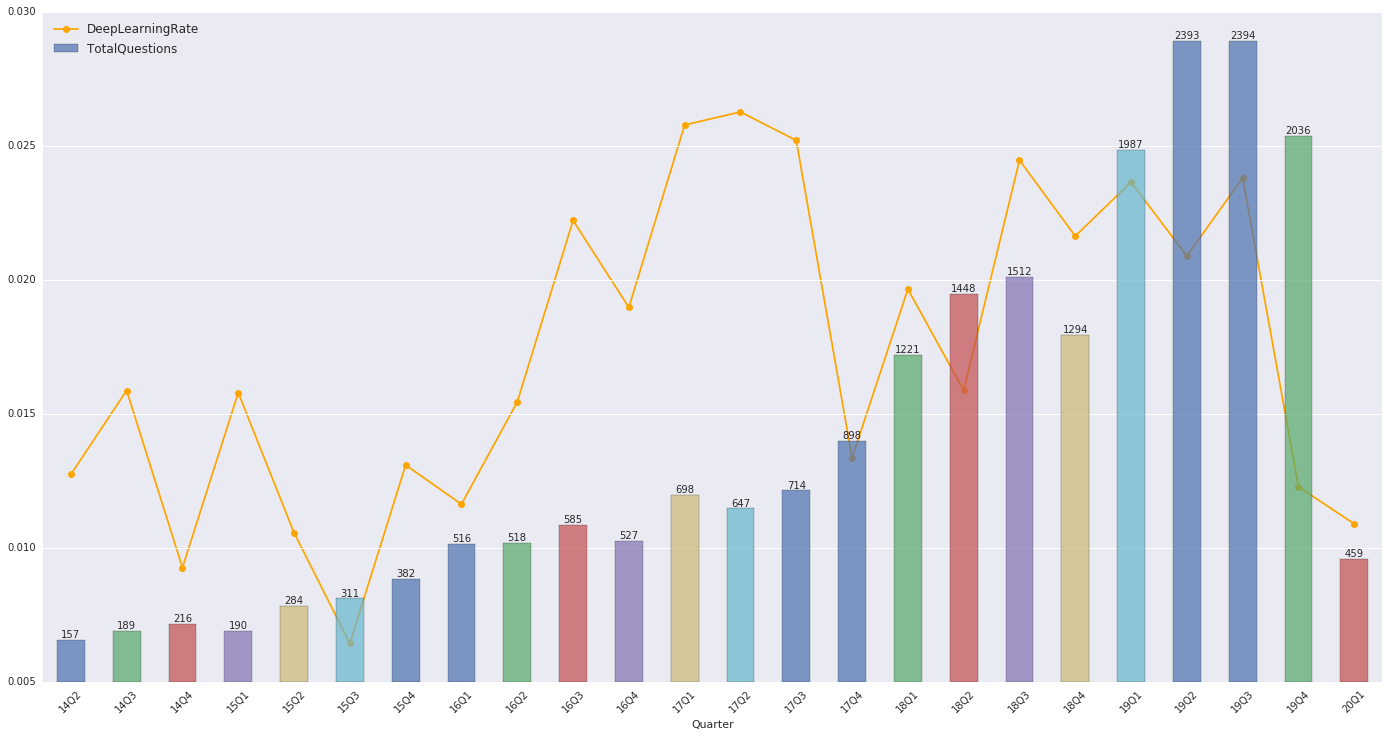

In [21]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

As a final result, it is shown that deep learning is teh most popular topic in machine learning right now. 